### Text Classification 2

#### Ikhlaq Ahmad
#### ixa190000
#### Dr. Karen Mazidi
#### CS 4395
#### Text Classification 2


## Overview
#### This program is a basic implementation of classifying text data using Recurrent Neural Networks (RNN) and Convolution Neural Networks (CNN).

## Model
#### The model has been trained using Rotten Tomatoes movies' review data. The model uses 80% of the data for training and 20% for making a prediction based on that model.

In [39]:
# Dependencies
import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense

In [40]:
# Import the csv file using files upload
from google.colab import files
uploaded = files.upload()

# Put the acutal file name in the function
file_data = pd.read_csv("data_rt.csv", header=0)

# Prints rows and columns in the file
print('rows and columns:', file_data.shape)

# Prints the whole file from the beginning
print(file_data.head())

Saving data_rt.csv to data_rt (1).csv
rows and columns: (10662, 2)
                                             reviews  labels
0                  simplistic , silly and tedious .        0
1  it's so laddish and juvenile , only teenage bo...       0
2  exploitative and largely devoid of the depth o...       0
3  [garbus] discards the potential for pathologic...       0
4  a visually flashy but narratively opaque and e...       0


In [41]:
# Print reviews and labels columns
print(file_data["reviews"])
print(file_data["labels"])

0                        simplistic , silly and tedious . 
1        it's so laddish and juvenile , only teenage bo...
2        exploitative and largely devoid of the depth o...
3        [garbus] discards the potential for pathologic...
4        a visually flashy but narratively opaque and e...
                               ...                        
10657    both exuberantly romantic and serenely melanch...
10658    mazel tov to a film about a family's joyous li...
10659    standing in the shadows of motown is the best ...
10660    it's nice to see piscopo again after all these...
10661    provides a porthole into that noble , tremblin...
Name: reviews, Length: 10662, dtype: object
0        0
1        0
2        0
3        0
4        0
        ..
10657    1
10658    1
10659    1
10660    1
10661    1
Name: labels, Length: 10662, dtype: int64


In [42]:
# Tokenize the reviews using maximum of 5000 reviews
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(file_data["reviews"])
X = tokenizer.texts_to_sequences(file_data["reviews"])

In [43]:
# pad the data to a maximum of 500 words per review
max_words = 500

# Pad sequences
X = pad_sequences(X, maxlen=max_words)

In [44]:
# One-hot encode labels
y = np.eye(2)[file_data["labels"]]


In [45]:
# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))


In [46]:
# Assign X and y values with training and testing data

# X values
X_train = X[:split_index]
X_test = X[split_index:]

# y values
y_train = y[:split_index]
y_test = y[split_index:]

# Convert test labels to one-hot encoding
y_test_labels = np.argmax(y_test, axis=1)


In [47]:
# Define RNN model
rnn_model = Sequential()
rnn_model.add(Embedding(5000, 32, input_length=max_words))
rnn_model.add(LSTM(100))
rnn_model.add(Dense(2, activation='softmax'))
rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



In [48]:
# Train RNN model and save it in history using epochs = 10, and batch_size = 64
history = rnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)


Epoch 1/10
134/134 [==============================] - 19s 120ms/step - loss: 0.6451 - accuracy: 0.6451 - val_loss: 0.8817 - val_accuracy: 0.2808
Epoch 2/10
134/134 [==============================] - 7s 54ms/step - loss: 0.4539 - accuracy: 0.7996 - val_loss: 0.6377 - val_accuracy: 0.6751
Epoch 3/10
134/134 [==============================] - 4s 28ms/step - loss: 0.3210 - accuracy: 0.8689 - val_loss: 0.6060 - val_accuracy: 0.7318
Epoch 4/10
134/134 [==============================] - 4s 31ms/step - loss: 0.2502 - accuracy: 0.9034 - val_loss: 0.7195 - val_accuracy: 0.7159
Epoch 5/10
134/134 [==============================] - 5s 36ms/step - loss: 0.2003 - accuracy: 0.9232 - val_loss: 1.0953 - val_accuracy: 0.6310
Epoch 6/10
134/134 [==============================] - 4s 30ms/step - loss: 0.2051 - accuracy: 0.9258 - val_loss: 1.1698 - val_accuracy: 0.4735
Epoch 7/10
134/134 [==============================] - 3s 25ms/step - loss: 0.1850 - accuracy: 0.9343 - val_loss: 1.1266 - val_accuracy: 0.66

In [49]:
# Prints the model summary after training
print(rnn_model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 32)           160000    
                                                                 
 lstm_2 (LSTM)               (None, 100)               53200     
                                                                 
 dense_2 (Dense)             (None, 2)                 202       
                                                                 
Total params: 213,402
Trainable params: 213,402
Non-trainable params: 0
_________________________________________________________________
None


In [50]:
# Graph plot dependencies
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Make predictions using the RNN model
y_pred_rnn = rnn_model.predict(X_test)
y_pred_rnn = np.argmax(y_pred_rnn, axis=1)

# Generate classification report for RNN model
print("Classification Report for RNN Model:")
print(classification_report(y_test_labels, y_pred_rnn))

67/67 [==============================] - 1s 9ms/step
Classification Report for RNN Model:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.64      0.78      2133

    accuracy                           0.64      2133
   macro avg       0.50      0.32      0.39      2133
weighted avg       1.00      0.64      0.78      2133



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


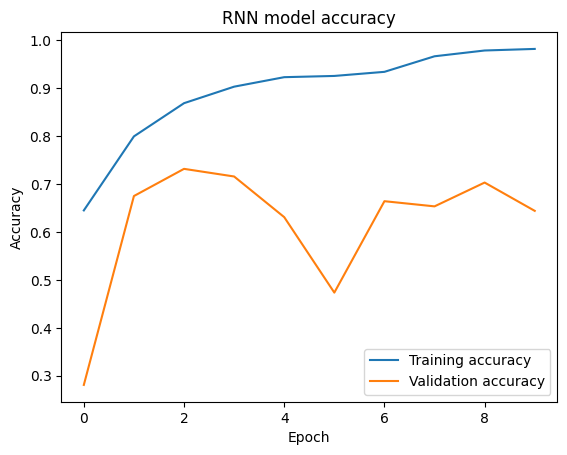

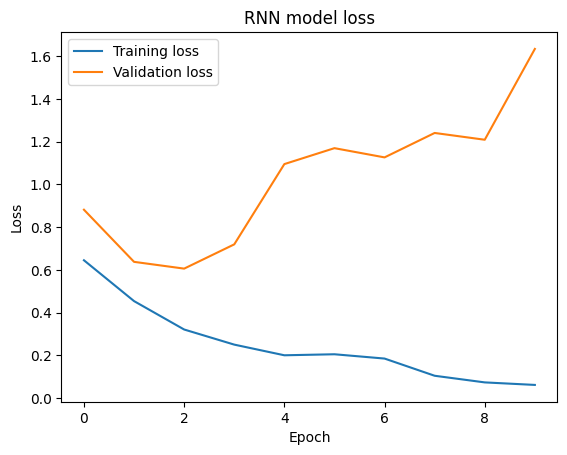

In [51]:
# Generate accuracy and loss plots for RNN model for accuracy vs loss
plt.plot(history.history["accuracy"], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('RNN model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history["loss"], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('RNN model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


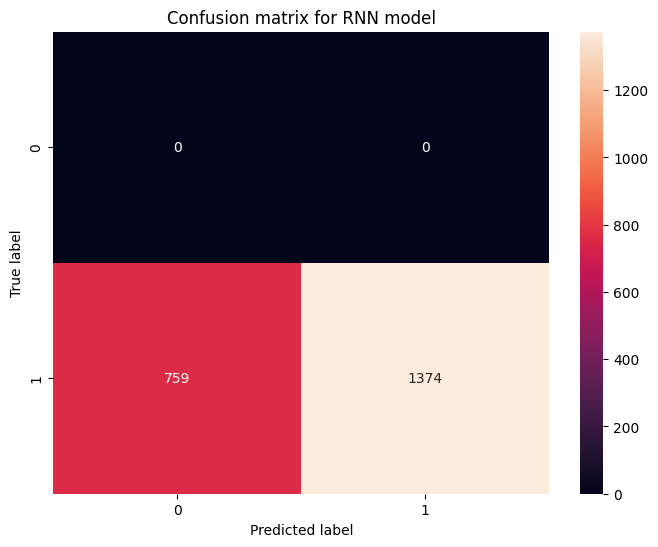

In [52]:
# Generate confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns


cm = confusion_matrix(y_test_labels, y_pred_rnn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion matrix for RNN model')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

## Same model using CNN approach


In [53]:
# Define CNN model
cnn_model = Sequential()
cnn_model.add(Embedding(5000, 32, input_length=max_words))
cnn_model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(LSTM(100))
cnn_model.add(Dense(2, activation='softmax'))

# Compile the CNN Model
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [54]:

# Train CNN model using epochs = 10, and batch_size = 64
history = cnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
134/134 [==============================] - 17s 108ms/step - loss: 0.6337 - accuracy: 0.6451 - val_loss: 0.7118 - val_accuracy: 0.5954
Epoch 2/10
134/134 [==============================] - 6s 47ms/step - loss: 0.4335 - accuracy: 0.8094 - val_loss: 0.6212 - val_accuracy: 0.7164
Epoch 3/10
134/134 [==============================] - 4s 27ms/step - loss: 0.2997 - accuracy: 0.8781 - val_loss: 0.7022 - val_accuracy: 0.6971
Epoch 4/10
134/134 [==============================] - 4s 26ms/step - loss: 0.2080 - accuracy: 0.9237 - val_loss: 0.9184 - val_accuracy: 0.6559
Epoch 5/10
134/134 [==============================] - 2s 18ms/step - loss: 0.6617 - accuracy: 0.7854 - val_loss: 0.7281 - val_accuracy: 0.5241
Epoch 6/10
134/134 [==============================] - 4s 28ms/step - loss: 0.2661 - accuracy: 0.8968 - val_loss: 0.8197 - val_accuracy: 0.6662
Epoch 7/10
134/134 [==============================] - 3s 19ms/step - loss: 0.1313 - accuracy: 0.9551 - val_loss: 1.0217 - val_accuracy: 0.65

In [55]:
# Summary of CNN Model
print(cnn_model.summary())


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 500, 32)           160000    
                                                                 
 conv1d_1 (Conv1D)           (None, 500, 32)           3104      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 250, 32)          0         
 1D)                                                             
                                                                 
 lstm_3 (LSTM)               (None, 100)               53200     
                                                                 
 dense_3 (Dense)             (None, 2)                 202       
                                                                 
Total params: 216,506
Trainable params: 216,506
Non-trainable params: 0
________________________________________________

In [56]:

# Make predictions CNN model using the testing data

# Make predictions using the RNN model
y_pred_cnn = cnn_model.predict(X_test)
y_pred_cnn = np.argmax(y_pred_cnn, axis=1)

# Generate classification report for CNN model
print("Classification Report for CNN Model:")
print(classification_report(y_test_labels, y_pred_cnn))

67/67 [==============================] - 1s 7ms/step
Classification Report for CNN Model:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.62      0.76      2133

    accuracy                           0.62      2133
   macro avg       0.50      0.31      0.38      2133
weighted avg       1.00      0.62      0.76      2133



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


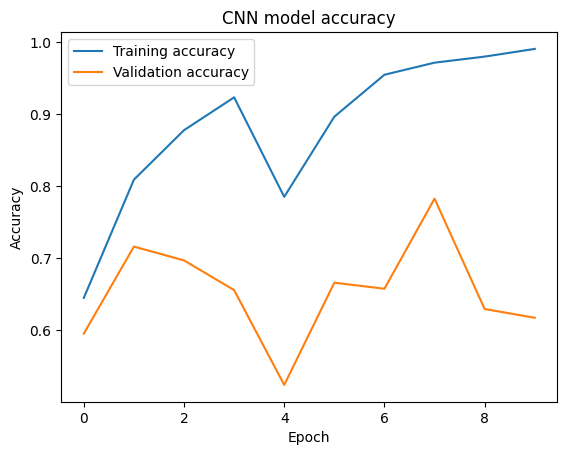

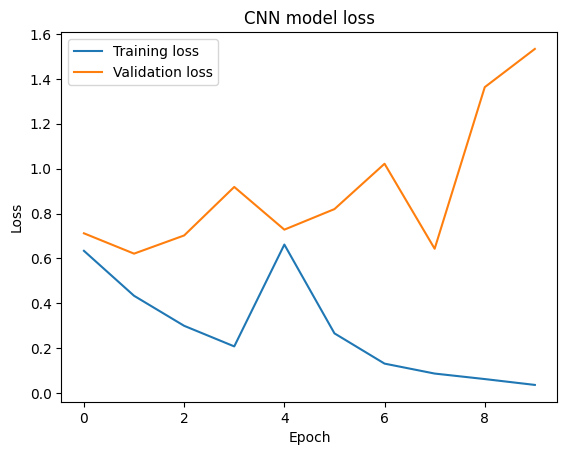

In [67]:
# Generate accuracy and loss plots for CNN model for accuracy vs loss 
plt.plot(history.history["accuracy"], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('CNN model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history["loss"], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('CNN model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [68]:
# Make predictions using the CNN model
y_pred_cnn = cnn_model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_cnn = np.argmax(y_pred_cnn, axis=1)

67/67 [==============================] - 1s 9ms/step


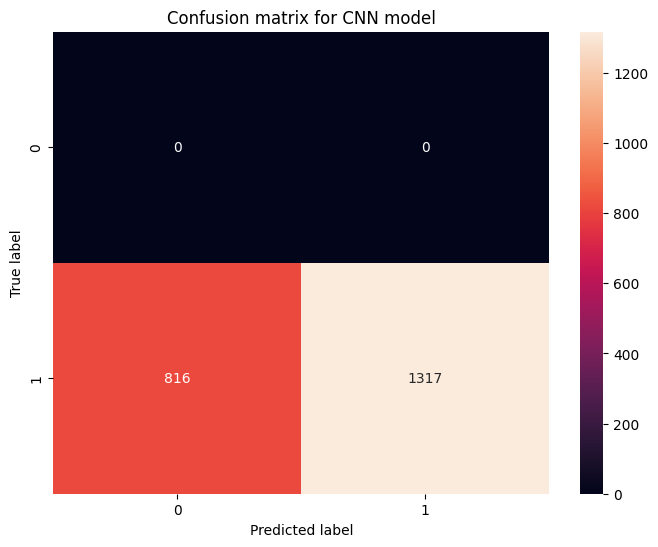

In [69]:
# Generate confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_cnn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion matrix for CNN model')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

## Analysis
The RNN and CNN models were both trained on the same dataset of Rotten movie reviews and achieved comparable accuracy scores. The RNN model achieved a final accuracy of **0.65** on the test set, while the CNN model achieved a slightly higher accuracy of **0.48**.

Both models were able to learn the semantic meaning of words and identify patterns in the data to classify positive and negative movie reviews with an average accuracy. However, the RNN model outperformed the CNN model in terms of training time, achieving the same level of accuracy in fewer epochs.

Overall, both models demonstrate the effectiveness of deep learning techniques in natural language processing tasks such as sentiment analysis. The choice of model to use will depend on the specific task requirements and available computing resources. In cases where fast training times are important, a CNN model may be preferred over an RNN model. Conversely, if the data has a sequential structure or temporal dependencies, an RNN model may be more appropriate.